In [69]:
import Pkg; 
Pkg.activate(joinpath(@__DIR__,"..")); 
Pkg.instantiate()

using ForwardDiff
using LinearAlgebra
using Statistics
using Plots
plotlyjs()
using Printf
using Random
using DifferentialEquations

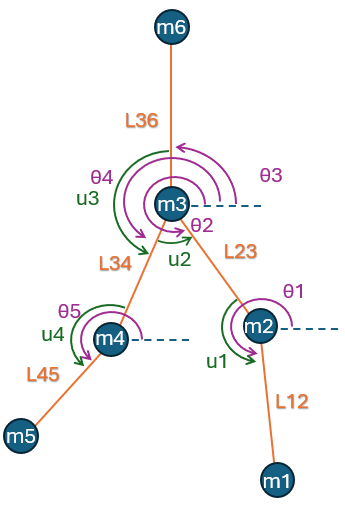

In [68]:
include("DynamicSystems/biped5link.jl") # Defines hybrid system functions

params = (m1 = 1,  m2 = 1,  m3 = 1,  m4 = 1,  m5 = 1,  m6 = 1,
		      l12 = 1, l23 = 1, l34 = 1, l45 = 1, l36 = 1, g = 9.81)

θ1 = 280 * (π/180)
θ2 = 300 * (π/180)
θ3 = 90 * (π/180)
θ4 = 250 * (π/180)
θ5 = 220 * (π/180)

x0 = 0
y0 = - params.l23 * cos(θ2) - params.l12 * cos(θ1)

q0 = [x0, y0, θ1, θ2, θ3, θ4, θ5]
q̇0 = zeros(7)

A = 10
ω = 2π
u = _t -> [0, A*sin(ω*_t), 0, 0]
# u = _t -> [0,0,0,0]
fpos = [x0, y0, 0 ,0]

h = 0.001 
tf = 5
T = Int.(tf/h)+1
times = h .* (0:T-1)
q_hist, q̇_hist, λ_hist = simulate(q0, q̇0, u, params, fpos, left_foot_constraint, h, T);

plot()
[plot!(times, q_hist[:,i], label="q$i") for i in 1:7]
display(plot!())

iter: 1    |r|: 1.7478180913322596e6   
iter: 2    |r|: 173769.52880568014   
iter: 3    |r|: 3143.2275485645837   
iter: 4    |r|: 1.2437772630695505   
iter: 5    |r|: 4.225329007967158e-7   
iter: 1    |r|: 4.967267883625859e-9   
iter: 1    |r|: 9.197460352469104e-9   
iter: 1    |r|: 1.7129518062311288e-8   
iter: 1    |r|: 2.8530403429435726e-8   
iter: 1    |r|: 4.268930131915801e-8   
iter: 1    |r|: 6.088998046548003e-8   
iter: 1    |r|: 8.301431789740564e-8   
iter: 1    |r|: 1.0941960687978784e-7   
iter: 1    |r|: 1.410008086541968e-7   
iter: 1    |r|: 1.780705682274087e-7   
iter: 1    |r|: 2.224910035274431e-7   
iter: 1    |r|: 2.748700183924825e-7   
iter: 1    |r|: 3.3715620501869786e-7   
iter: 1    |r|: 4.114943189729547e-7   
iter: 1    |r|: 4.999149075729029e-7   
iter: 1    |r|: 6.048546348563375e-7   
iter: 1    |r|: 7.300792300575581e-7   
iter: 1    |r|: 8.771343192856008e-7   
iter: 1    |r|: 1.0512708653199232e-6   
iter: 1    |r|: 1.2538029374327128e-6   


Excessive output truncated after 524341 bytes.

iter: 30    |r|: 0.0010137855758463592   
iter: 31    |r|: 0.0010135256628325524   
iter: 32    |r|: 0.0010132693303828908   
iter: 33    |r|: 0.001013010735637774   
iter: 34    |r|: 0.0010127562012819038   
iter: 35    |r|: 0.001012501310607286   
iter: 36    |r|: 0.0010122482766955722   
iter: 37    |r|: 0.0010119963158274118   
iter: 38    |r|: 0.0010117455883791862   
iter: 39    |r|: 0.0010114949981161643   
iter: 40    |r|: 0.001011248325971524   
iter: 41    |r|: 0.0010110014831782622   
iter: 42    |r|: 0.001010754634057752   
iter: 43    |r|: 0.001010510454445437   
iter: 44    |r|: 0.0010102670625125219   
iter: 45    |r|: 0.0010100254040898947   
iter: 46    |r|: 0.0010097846992777103   
iter: 47    |r|: 0.0010095455789273199   
iter: 48    |r|: 0.0010093071067674177   
iter: 49    |r|: 0.0010090708539014226   
iter: 50    |r|: 0.0010088346317342167   
iter: 51    |r|: 0.001008600167257624   
iter: 52    |r|: 0.0010083677757210027   
iter: 53    |r|: 0.001008135586147125   

ErrorException: Newton iteration did not converge